In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
X_, y_ = load_boston(return_X_y =True)
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.3)

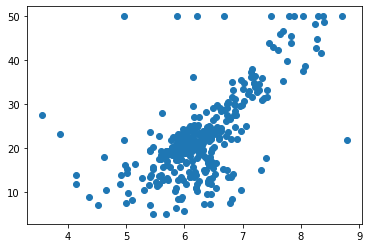

In [3]:
plt.scatter(X_train[:, 5], y_train)
plt.show()

In [4]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Implementation

In [5]:
class LinearRegression:
    """
    Linear Regression model 
    
    Attributes
    ----------------
    eta : float
        learning rate
    n_iters : int
        number of epochs to train model
    w : one-dimensional array
        vector of weights [n_features, ]
    b : float
        bias of the model
        
    Methods
    -----------------
    fit(X, y)
        fits model to data
    predict(X)
        predict values for samples in matrix X
    __loss(y_true, y_pred)
        calculate mean squared error of prediction
    """
    
    def __init__(self, eta=0.01, n_iters=10):
        self.eta = eta
        self.n_iters = n_iters
        self.w = None
        self.b = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # initialize random weights 
        self.w = np.random.sample(n_features)
        self.b = np.random.sample()
        cost_ = []
        for i in range(self.n_iters):
            # predict values
            y_pred = self.predict(X)
            cost = self.__loss(y, y_pred)
            error = (y_pred - y) / n_samples
            # adjust weights
            self.w -= self.eta * np.dot(X.T, error)
            self.b -= self.eta * error.sum()
            cost_.append(cost)
        return cost_
    
    def predict(self, x):
        return np.dot(x, self.w) + self.b
    
    def __loss(self, y_true, y_pred):
        return ((y_true - y_pred) ** 2).mean() / 2

# Train model

In [6]:
epochs = 100
lr = LinearRegression(learning_rate=0.05, n_iters=epochs)

In [7]:
cost = lr.fit(X_train, y_train)

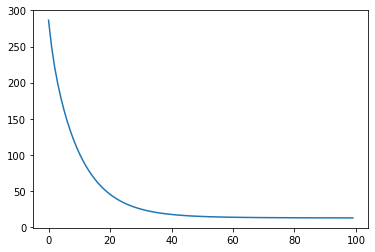

In [8]:
plt.plot(np.arange(0, epochs), cost)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

# Validate model

In [9]:
print(f'Mean squared error for training set: {mean_squared_error(y_train, lr.predict(X_train))}')
print(f'Mean squared error for test set: {mean_squared_error(y_test, lr.predict(X_test))}')

Mean squared error for training set: 25.83402573487595
Mean squared error for test set: 14.914880288635139


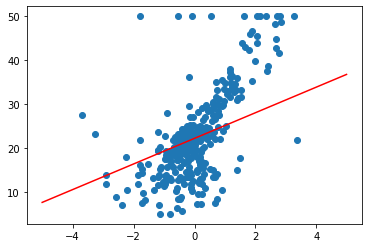

In [10]:
x = np.arange(-5, 5, 0.01)
plt.scatter(X_train[:, 5], y_train)
plt.plot(x, lr.w[5] * x + lr.b, color='red')
plt.show()